# Using Machine Learning  to Create a CLTV Analysis from Shopify Data

<div>
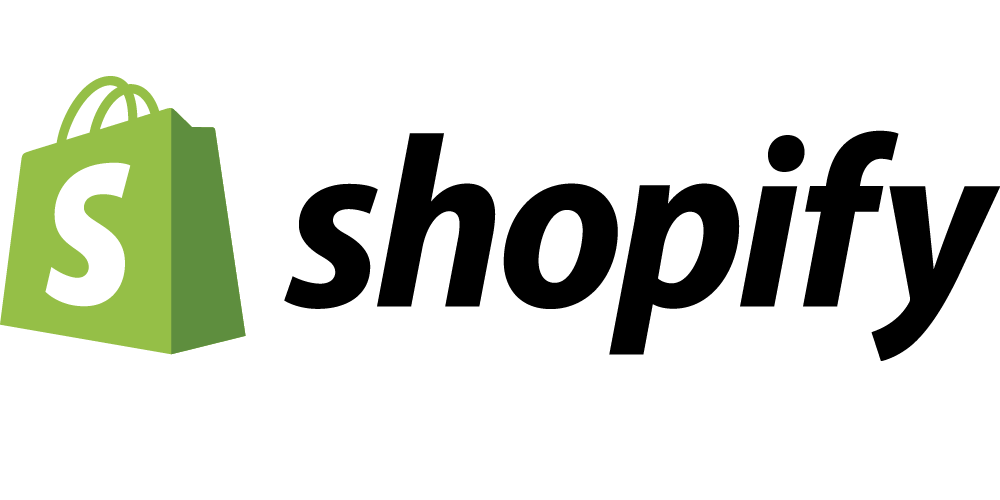
</div>

##  TABLE OF CONTENTS: 

<br> **I. INTRODUCTION**  
- 1. Project Purpose.
- 2. Loading our data.
- 3. Previewing our data

<br> **II. DATA WRANGLING**  
- 1. Cleaning up and fixing issues. 
- 2. Creating a new dataframe for Unique Customers. 
- 3. Creating a new dataframe for Unique Orders.
- 4. Creating a new dataframe for Unique Items. 

<br> **II. EXPLORATORY DATA ANALYSIS**  
- Point 1 
- Point 2

<br> **III. PREPROCESSING AND TRAINING DATA** 
- Point 1 
- Point 2

<br> **IV.MODELLING**  
- Point 1 
- Point 2

<br> **V. CONCLUSIONS** 

# I. Introduction: 

Welcome to this Tutorial on Extracting Shopify Data to create a Customer Lifetime Value (CLTV) Analysis! This notebook will walk you through the steps so you too can replicate this for your business! 

As of 2021, e-commerce is, worldwide, a **$4.89 trillion** industry. One of the leading platforms in this marketplace is Shopify which currently has a 23% market share in the United States. There are currently over 2.6 million live stores in the US. To put it into perspective, this means that there is 1 store for every 127 Americans. With e-commerce expected to keep growing in the coming years, it is imperative for small business owners to really understand the behavior of their customers on this shopping platform and how to get the most use of the available transaction data.

The purpose of this project is to apply Data Science Machine Learning methods to learn more about customer behavior. This project will seek to serve shopify store owners and demystify Machine learning techniques so that any-one would be able to replicate this analysis for their own purposes. Since Shopify data is standardized and delivers. 


 One of the most important metrics for any business is the LTV / CAC ratio. LTV is defined as the Lifetime Value of a Customer and the CAC is defined as the Customer Acquisition Cost, i.e. the cost to acquire a certain customer.  Therefore, t
 


In [1]:
## We start by importing the appropriate packages which we will want to use. 
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', None)

In [2]:
## We create our dataframe
raw_data = pd.read_csv('.\CLEANED_data.csv')

C:\Users\benja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (20,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# We preview our dataframe
raw_data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment Terms Name,Next Payment Due At
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,NaN,no,USD,142.0,0.00,11.72,153.72,NaN,0.0,Free Shipping,11/11/2021 16:53,1,Mint Crossback Sports Bra - S,38.0,NaN,100.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,DIXON,'61021,IL,US,NaN,NaN,NaN,NaN,NaN,NaN,DIXON,'61021,IL,US,NaN,NaN,NaN,NaN,Shopify Payments,c29208367530214.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,Dixon City Tax 0.5%,0.71,Illinois State Tax 6.25%,8.88,Lee County Tax 1.5%,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illinois,Illinois,NaN,NaN
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021 16:53,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,300.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021 16:53,1,Black/Mint Contour Leggings - XS,52.0,NaN,100.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#29488,Anonymous9987,paid,11/11/2021 10:09,unfulfilled,NaN,no,USD,40.0,5.36,2.90,48.26,NaN,0.0,Standard Shipping,11/11/2021 10:09,1,Black Long Sleeve Top - L,40.0,NaN,102.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,Moreno Valley,'92553,CA,US,NaN,NaN,NaN,NaN,NaN,NaN,Moreno Valley,'92553,CA,US,NaN,NaN,NaN,NaN,Afterpay North America,c29207688708326.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,California State Tax 7.25%,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,California,NaN,NaN
4,#29487,Anonymous9675,paid,11/10/2021 14:54,fulfilled,11/11/2021 10:56,no,USD,94.0,5.06,0.00,99.06,NaN,0.0,Standard Shipping,11/10/2021 14:54,1,Raspberry Crossover Sports Bra - XL,38.0,NaN,53.0,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,ELKINS PARK,19027-1829,PA,US,NaN,NaN,NaN,NaN,NaN,NaN,ELKINS PARK,19027-1829,PA,US,NaN,NaN,NaN,NaN,Shopify Payments,c29206160441574.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pennsylvania,Pennsylvania,NaN,NaN


In [4]:
# We look at the values.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         50418 non-null  object 
 1   Email                        46372 non-null  object 
 2   Financial Status             28489 non-null  object 
 3   Paid at                      27735 non-null  object 
 4   Fulfillment Status           28489 non-null  object 
 5   Fulfilled at                 27256 non-null  object 
 6   Accepts Marketing            28489 non-null  object 
 7   Currency                     28489 non-null  object 
 8   Subtotal                     28489 non-null  float64
 9   Shipping                     28489 non-null  float64
 10  Taxes                        28489 non-null  float64
 11  Total                        28489 non-null  float64
 12  Discount Code                7339 non-null   object 
 13  Discount Amount 

# Data Cleansing: 

- **Step 1:** Removing redundant and uneccessary columns
- **Step 2:** Renaming Columns
- **Step 3:** Replace NaN of certain columns with more relevant values. 
- **Step 4:** 
- **Step 5:** 
- **Step 6:** 
- **Step 7:** 


### Step 1: Removing redundant and uncessary columns 
- Shopify extractions at times are redundant
- Point 2 
- Point 3

In [5]:
## We remove the columns defined in the column_to_drop variable and use the drop method to remove them, previewing our data.
columns_to_drop = ['Fulfilled at','Currency','Created at','Lineitem compare at price','Lineitem requires shipping','Lineitem taxable','Lineitem fulfillment status','Billing Name','Billing Street','Billing Address1','Billing Address2','Billing Company','Billing Phone','Shipping Name','Shipping Street','Shipping Address1','Shipping Address2','Shipping Company','Shipping City','Shipping Zip','Shipping Province','Shipping Country','Shipping Phone','Notes','Note Attributes','Payment Reference','Vendor','Id','Tags','Risk Level','Source','Tax 1 Name','Tax 1 Value','Tax 2 Name','Tax 2 Value','Tax 3 Name','Tax 3 Value','Tax 4 Name','Tax 4 Value','Tax 5 Name','Tax 5 Value','Phone','Receipt Number','Duties','Billing Province Name','Shipping Province Name','Payment Terms Name','Next Payment Due At','Lineitem sku']
raw_data.drop(columns=columns_to_drop, inplace = True)
raw_data.head(3)

,Name,Email,Financial Status,Paid at,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,NaN,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 2: Renaming Columns

In [6]:
## We give our columns improved names. 
raw_data = raw_data.rename(columns={'Name': 'OrderID','Paid at': 'Transaction Date'} )
raw_data.head(3)

,OrderID,Email,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,NaN,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 3: Fill some NA

In [7]:
raw_data['Discount Code'] = raw_data['Discount Code'].fillna('')
raw_data['Discount Amount'] = raw_data['Discount Amount'].fillna(0)
raw_data.head(3)

,OrderID,Email,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 4: Removing data for which we do not have emails: 

In [8]:
raw_data.dropna(subset=['Email'], inplace = True)
raw_data.head(3)

,OrderID,Email,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 5: Converting Transaction Date to Datetime

In [9]:
raw_data['Transaction Date'] = pd.to_datetime(raw_data['Transaction Date'], errors='coerce')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46372 entries, 0 to 50416
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderID             46372 non-null  object        
 1   Email               46372 non-null  object        
 2   Financial Status    25909 non-null  object        
 3   Transaction Date    25188 non-null  datetime64[ns]
 4   Fulfillment Status  25909 non-null  object        
 5   Accepts Marketing   25909 non-null  object        
 6   Subtotal            25909 non-null  float64       
 7   Shipping            25909 non-null  float64       
 8   Taxes               25909 non-null  float64       
 9   Total               25909 non-null  float64       
 10  Discount Code       46372 non-null  object        
 11  Discount Amount     46372 non-null  float64       
 12  Shipping Method     25383 non-null  object        
 13  Lineitem quantity   46372 non-null  int64     

In [10]:
raw_data.Email.value_counts()

Anonymous4843     56
Anonymous6363     56
Anonymous7500     46
Anonymous540      43
Anonymous13455    42
                  ..
Anonymous9641      1
Anonymous5366      1
Anonymous4837      1
Anonymous14778     1
Anonymous16312     1
Name: Email, Length: 16472, dtype: int64

Now that we have cleaned our data, we will want to create three seperate dataframe 

In [11]:
print('The number of unique orders in this dataset is: ' +str(raw_data['OrderID'].nunique()))
print('The number of unique customers in this dataset is: ' + str(raw_data['Email'].nunique()))
print('The number of unique items sold in this dataset is: ' +str(raw_data['Lineitem name'].nunique()))

The number of unique orders in this dataset is: 25909
The number of unique customers in this dataset is: 16472
The number of unique items sold in this dataset is: 566


### Step 6: Creating a dataframe that contains unique customers.

In [12]:
def count_discount_codes(discount_codes):
    '''
    This function returns the number of distinct coupons used 
    '''
    counter = 0
    for entry in discount_codes:
        if entry != '':
            counter += 1
    return counter


In [13]:
## We create a new customer dataframe which 
customer =  raw_data.groupby(['Email']).agg(Number_of_Orders = ('OrderID', 'nunique'),
                                            Total_Items_Purchased = ('Lineitem quantity', np.sum),
                                            Total_Spent = ('Subtotal', np.sum),
                                            Coupons_Used = ('Discount Code', count_discount_codes),                         
                                            Oldest_Order = ('Transaction Date', np.min), 
                                            Most_Recent = ('Transaction Date', np.max)
                                            )

customer.sort_values('Number_of_Orders', ascending = False, inplace=True)
customer['Days_Between_First_and_last_Order'] = customer['Most_Recent'] - customer['Oldest_Order']
customer['repeat_customer'] = np.where(customer['Oldest_Order'] != customer['Most_Recent'],1,0)
customer.dropna(inplace=True)
customer.reset_index(inplace=True)
customer.head(3)

,Email,Number_of_Orders,Total_Items_Purchased,Total_Spent,Coupons_Used,Oldest_Order,Most_Recent,Days_Between_First_and_last_Order,repeat_customer
0,Anonymous13455,36,42,1480.60,14,2020-06-30 17:54:00,2021-10-15 16:10:00,471 days 22:16:00,1
1,Anonymous2142,23,37,1244.90,11,2019-05-09 15:48:00,2021-08-10 09:57:00,823 days 18:09:00,1
2,Anonymous4843,22,56,2259.05,3,2019-10-14 22:08:00,2021-10-15 16:59:00,731 days 18:51:00,1


In [14]:
## We check for the repeat for the number of customers.
customer['repeat_customer'].value_counts()

0    11624
1     4556
Name: repeat_customer, dtype: int64

In [15]:
## Use this to check if a customer is repeat
customer.query("Email == 'debkhills@yahoo.com'")

,Email,Number_of_Orders,Total_Items_Purchased,Total_Spent,Coupons_Used,Oldest_Order,Most_Recent,Days_Between_First_and_last_Order,repeat_customer


### Step 7: Creating a grouped dataframe by order. 

In [16]:
orders =  raw_data.groupby(['OrderID']).agg(Total_Spent = ('Subtotal', np.sum),
                                            Total_Items_Purchased = ('Lineitem quantity', np.sum),
                                            Customer = ('Email', np.max),
                                            Transaction_Date = ('Transaction Date', np.max)
                                            )

orders.reset_index(inplace= True)
orders['OrderID'] = orders['OrderID'].apply(lambda x: x.replace('#','')).astype(int) ## This may need to be moved up. 
orders = orders.sort_values('OrderID', ascending = False)
orders.dropna(inplace=True)

orders.head(3)

,OrderID,Total_Spent,Total_Items_Purchased,Customer,Transaction_Date
20610,29489,142.0,3,Anonymous4245,2021-11-11 16:53:00
20609,29488,40.0,1,Anonymous9987,2021-11-11 10:09:00
20608,29487,94.0,2,Anonymous9675,2021-11-10 14:54:00


In [17]:
## We add a column for the duplicate to identify the customers who made a repeat purchase
duplicated_orders = list(orders.Customer[orders.Customer.duplicated()])
orders['repeat_customer'] = np.where(orders['Customer'].apply(lambda x: x in duplicated_orders),1,0)
orders.head(3)


,OrderID,Total_Spent,Total_Items_Purchased,Customer,Transaction_Date,repeat_customer
20610,29489,142.0,3,Anonymous4245,2021-11-11 16:53:00,1
20609,29488,40.0,1,Anonymous9987,2021-11-11 10:09:00,1
20608,29487,94.0,2,Anonymous9675,2021-11-10 14:54:00,0


In [18]:
orders['repeat_customer'].value_counts()

1    13565
0    11623
Name: repeat_customer, dtype: int64

In [19]:
orders.query("Customer == 'brittany.lee.albright@gmail.com'")

,OrderID,Total_Spent,Total_Items_Purchased,Customer,Transaction_Date,repeat_customer


In [20]:
orders.query("Customer == 'bernalirene08@gmail.com'")

,OrderID,Total_Spent,Total_Items_Purchased,Customer,Transaction_Date,repeat_customer


### Step 8: Creating a grouped dataframe by item. 

In [21]:
items =  raw_data.groupby(['Lineitem name']).agg(Times_Purchased = ('Lineitem quantity', np.sum),
                                                 Price = ('Lineitem price', np.max)
                                                 )

items.sort_values('Times_Purchased', ascending = False, inplace=True)
items.reset_index(inplace=True)
items

,Lineitem name,Times_Purchased,Price
0,Black/Mint Contour Leggings - M,1042,50.0
1,Black/Mint Contour Leggings - S,896,52.0
2,Resistance Bands,650,25.0
3,Black/Grey Contour Leggings - M,601,52.0
4,Black/Dark Blue Contour Leggings - S,599,50.0
...,...,...,...
561,Navy Blue Seamful Leggings - L,1,40.0
562,High-Waisted Leggings Forest Green *PREORDER* - M,1,47.0
563,Cropped Fleece Hoodie - grey / L,1,32.0
564,Black Seamful Leggings - XXL,1,50.0


In [22]:
## We create a size column seperating it in 6 different sizes and a no size. 
"""
Filling item info: 
 - left column is the desired label (for example for sizes, 'L', 'M' etc.)
 - right column between [] is the list (separated by commas) of ways the info can appear in the item's name
See example below on how to fill for item sizes if the sizes show up as "... / L" or "... - L", etc.
"""

def get_item_size(row):
    dict_sizes = {'XS': ['- XS', '/ XS'],
                  'S': ['- S', '/ S'],
                  'M': ['- M', '/ M'],
                  'L': ['- L', '/ L'],
                  'XL': ['- XL', '/ XL'],
                  'XXL': ['- XXL', '/ XXL']}

    item_name = row['Lineitem name']
    for key in dict_sizes.keys():
        for value in dict_sizes[key]:
            if value in item_name:
                return key
    return 'No size'

items['size'] = items.apply(get_item_size, axis=1)
items.head()
#items['size'].value_counts()  #< -- Uncommenting this will allow to see the count of each item by size. 
#items[items['size'] =='No size'] #< -- Uncommenting this will allow to see the items with no sizes. 

,Lineitem name,Times_Purchased,Price,size
0,Black/Mint Contour Leggings - M,1042,50.0,M
1,Black/Mint Contour Leggings - S,896,52.0,S
2,Resistance Bands,650,25.0,No size
3,Black/Grey Contour Leggings - M,601,52.0,M
4,Black/Dark Blue Contour Leggings - S,599,50.0,S


In [23]:
'''
def get_item_type(row):
    dict_items = {'Long Sleeve': ['Long Sleeve'],
                  'Barbell': ['Barbell'],
                  'Cable Cuffs': ['Cable Cuffs'],
                  'Resistance Bands': ['Resistance Bands'],
                  'Leggings': ['Leggings'],
                  'Sports Bra': ['Sports Bra'],
                  '': [''],
                  '': [''],
                  '': [''],
                  '': [''],
                  '': [''],
                  '': [''],
                  '': ['']}
    
    item_name = row['Lineitem name']
    for key in dict_items.keys():
        for value in dict_items[key]:
            if value in item_name:
                return key
    return 'Other'
    
items['type'] = items.apply(get_item_type, axis=1)
items.head(10)
'''

"\ndef get_item_type(row):\n    dict_items = {'Long Sleeve': ['Long Sleeve'],\n                  'Barbell': ['Barbell'],\n                  'Cable Cuffs': ['Cable Cuffs'],\n                  'Resistance Bands': ['Resistance Bands'],\n                  'Leggings': ['Leggings'],\n                  'Sports Bra': ['Sports Bra'],\n                  '': [''],\n                  '': [''],\n                  '': [''],\n                  '': [''],\n                  '': [''],\n                  '': [''],\n                  '': ['']}\n    \n    item_name = row['Lineitem name']\n    for key in dict_items.keys():\n        for value in dict_items[key]:\n            if value in item_name:\n                return key\n    return 'Other'\n    \nitems['type'] = items.apply(get_item_type, axis=1)\nitems.head(10)\n"

In [24]:
def get_item_type(row):
    item_name = row['Lineitem name']
    if 'Long Sleeve' in item_name:
        return 'Long Sleeve'
    elif 'Barbell' in item_name:
        return 'Barbell' 
    elif 'Cable Cuffs' in item_name:
        return 'Cable Cuffs' 
    elif 'Resistance Bands' in item_name:
        return 'Resistance Bands' 
    elif 'Leggings' in item_name:
        return 'Leggings'
    elif 'Sports Bra' in item_name:
        return 'Sports Bra' 
    elif 'Jacket' in item_name:
        return 'Jacket' 
    elif 'Crop Tops' in item_name:
        return 'Crop Tops' 
    elif 'Shorts' in item_name:
        return 'Shorts' 
    elif 'Shirts' in item_name:
        return 'Shirts' 
    elif 'Sweater' in item_name:
        return 'Sweater' 
    elif 'Hoodie' in item_name:
        return 'Hoodie' 
    elif 'Camo' in item_name:
        return 'Camo'
    
    return 'Other'
    
items['type'] = items.apply(get_item_type, axis=1)
items.head(10)

,Lineitem name,Times_Purchased,Price,size,type
0,Black/Mint Contour Leggings - M,1042,50.0,M,Leggings
1,Black/Mint Contour Leggings - S,896,52.0,S,Leggings
2,Resistance Bands,650,25.0,No size,Resistance Bands
3,Black/Grey Contour Leggings - M,601,52.0,M,Leggings
4,Black/Dark Blue Contour Leggings - S,599,50.0,S,Leggings
5,Resistance Bands (Original Colors),582,25.0,No size,Resistance Bands
6,Black/Burgundy Contour Leggings - M,577,52.0,M,Leggings
7,Black/Dark Blue Contour Leggings - M,574,50.0,M,Leggings
8,Cable Cuffs,564,16.0,No size,Cable Cuffs
9,High-Waisted Camo Leggings - M,554,52.0,M,Leggings


In [25]:
items['Product Sku'] = [i+1 for i in range(len(items))]
items = items.iloc[:, [5, 0, 1, 2, 3, 4]]
items

,Product Sku,Lineitem name,Times_Purchased,Price,size,type
0,1,Black/Mint Contour Leggings - M,1042,50.0,M,Leggings
1,2,Black/Mint Contour Leggings - S,896,52.0,S,Leggings
2,3,Resistance Bands,650,25.0,No size,Resistance Bands
3,4,Black/Grey Contour Leggings - M,601,52.0,M,Leggings
4,5,Black/Dark Blue Contour Leggings - S,599,50.0,S,Leggings
...,...,...,...,...,...,...
561,562,Navy Blue Seamful Leggings - L,1,40.0,L,Leggings
562,563,High-Waisted Leggings Forest Green *PREORDER* - M,1,47.0,M,Leggings
563,564,Cropped Fleece Hoodie - grey / L,1,32.0,L,Hoodie
564,565,Black Seamful Leggings - XXL,1,50.0,XXL,Leggings


In [26]:
customer.head()

,Email,Number_of_Orders,Total_Items_Purchased,Total_Spent,Coupons_Used,Oldest_Order,Most_Recent,Days_Between_First_and_last_Order,repeat_customer
0,Anonymous13455,36,42,1480.60,14,2020-06-30 17:54:00,2021-10-15 16:10:00,471 days 22:16:00,1
1,Anonymous2142,23,37,1244.90,11,2019-05-09 15:48:00,2021-08-10 09:57:00,823 days 18:09:00,1
2,Anonymous4843,22,56,2259.05,3,2019-10-14 22:08:00,2021-10-15 16:59:00,731 days 18:51:00,1
3,Anonymous11225,21,27,1022.85,5,2020-01-31 17:54:00,2021-05-25 13:46:00,479 days 19:52:00,1
4,Anonymous540,20,43,1534.10,15,2020-01-03 16:21:00,2021-08-09 09:02:00,583 days 16:41:00,1


In [27]:
items.head()

,Product Sku,Lineitem name,Times_Purchased,Price,size,type
0,1,Black/Mint Contour Leggings - M,1042,50.0,M,Leggings
1,2,Black/Mint Contour Leggings - S,896,52.0,S,Leggings
2,3,Resistance Bands,650,25.0,No size,Resistance Bands
3,4,Black/Grey Contour Leggings - M,601,52.0,M,Leggings
4,5,Black/Dark Blue Contour Leggings - S,599,50.0,S,Leggings


In [28]:
raw_data.head(10)

,OrderID,Email,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,2021-11-11 16:53:00,unfulfilled,no,142.00,0.00,11.72,153.72,,0.00,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,,0.00,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,,0.00,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,#29488,Anonymous9987,paid,2021-11-11 10:09:00,unfulfilled,no,40.00,5.36,2.90,48.26,,0.00,Standard Shipping,1,Black Long Sleeve Top - L,40.0,Moreno Valley,'92553,CA,US,NaN,Afterpay North America,0.0,0.0
4,#29487,Anonymous9675,paid,2021-11-10 14:54:00,fulfilled,no,94.00,5.06,0.00,99.06,,0.00,Standard Shipping,1,Raspberry Crossover Sports Bra - XL,38.0,ELKINS PARK,19027-1829,PA,US,NaN,Shopify Payments,0.0,0.0
5,#29487,Anonymous9675,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,,0.00,NaN,1,Raspberry Crossover Leggings - XL,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,#29486,Anonymous8266,paid,2021-11-09 23:07:00,fulfilled,no,52.00,6.63,3.77,62.40,,0.00,Standard Shipping,1,High-Waisted Camo Leggings - L,52.0,Sacramento,'95823,CA,US,NaN,Shopify Payments,0.0,0.0
7,#29485,Anonymous7639,paid,2021-11-09 18:45:00,fulfilled,no,102.00,4.76,8.82,115.58,,0.00,Standard Shipping,1,Black/Grey Contour Leggings - M,52.0,Forest Hill,'76140,TX,US,NaN,Shop Pay Installments,0.0,0.0
8,#29485,Anonymous7639,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,,0.00,NaN,1,Black Seamful Leggings - M,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,#29484,Anonymous1418,paid,2021-11-09 17:47:00,fulfilled,no,24.75,4.89,2.85,32.49,JULIA10,2.75,Standard Shipping,1,White Half-Zip Sweater - M,27.5,Chicago,'60621,IL,US,NaN,Shopify Payments,0.0,0.0


In [29]:
def parse_customer_purchases(row):
    """
    1. For the customer in this row in the customer dataframe, 
       go fetch all their purchases in the raw_data dataframe.
    2. Populate a dictionary that stores all the unique product skus corresponding to these purchases.
       The value for each sku is the number of times the item was purchased.
    """
    # Step 1: For this customer, find all their purchases
    customer_email = row['Email']
    items_purchased = raw_data.loc[raw_data['Email'] == customer_email]['Lineitem name']

    # Step 2: Create the empty dictionary
    # (key = product sku, value = number of times bought)
    dict_items_purchased = {}
    for item in items_purchased:
        # Step 2: For each item in the items_purchased, find its unique sku
        item_sku = items.loc[items['Lineitem name'] == item]['Product Sku'].values[0]
        # Step 2: If we have never seen that sku before, store it as a new entry in the dictionary.
        #         Give it a value of 1 as it's only showed up once in the items_purchased.
        if item_sku not in dict_items_purchased.keys():
            dict_items_purchased[item_sku] = 1
        # Step 2: If we have seen that sku before, it is in the dictionary keys and we add 1
        #         to the value, meaning that it's been purchased one more time. When we exit the
        #         loop, this will give us the total number of times the customer purchased that item.
        else:
            dict_items_purchased[item_sku] += 1

    return dict_items_purchased

customer['Products_Purchased'] = customer.apply(parse_customer_purchases, axis=1)
customer.head(10)

,Email,Number_of_Orders,Total_Items_Purchased,Total_Spent,Coupons_Used,Oldest_Order,Most_Recent,Days_Between_First_and_last_Order,repeat_customer,Products_Purchased
0,Anonymous13455,36,42,1480.60,14,2020-06-30 17:54:00,2021-10-15 16:10:00,471 days 22:16:00,1,"{365: 1, 351: 1, 158: 1, 183: 1, 139: 2, 187: ..."
1,Anonymous2142,23,37,1244.90,11,2019-05-09 15:48:00,2021-08-10 09:57:00,823 days 18:09:00,1,"{382: 1, 64: 1, 180: 2, 250: 1, 90: 3, 307: 1,..."
2,Anonymous4843,22,56,2259.05,3,2019-10-14 22:08:00,2021-10-15 16:59:00,731 days 18:51:00,1,"{91: 1, 18: 1, 304: 1, 342: 1, 389: 1, 236: 2,..."
3,Anonymous11225,21,27,1022.85,5,2020-01-31 17:54:00,2021-05-25 13:46:00,479 days 19:52:00,1,"{25: 1, 155: 1, 274: 1, 163: 1, 81: 1, 87: 1, ..."
4,Anonymous540,20,43,1534.10,15,2020-01-03 16:21:00,2021-08-09 09:02:00,583 days 16:41:00,1,"{394: 1, 351: 1, 365: 1, 158: 1, 169: 1, 100: ..."
5,Anonymous11560,19,35,1363.60,8,2018-11-12 22:14:00,2021-09-24 23:33:00,1047 days 01:19:00,1,"{506: 1, 548: 1, 534: 1, 530: 1, 471: 1, 468: ..."
6,Anonymous8181,19,28,1168.00,0,2020-05-27 02:09:00,2021-08-09 09:52:00,439 days 07:43:00,1,"{471: 1, 250: 1, 180: 1, 64: 1, 55: 1, 96: 1, ..."
7,Anonymous6363,18,56,2051.70,5,2018-07-04 18:44:00,2021-10-12 10:20:00,1195 days 15:36:00,1,"{212: 1, 416: 1, 270: 1, 243: 1, 169: 1, 115: ..."
8,Anonymous14618,18,32,1209.00,1,2020-06-22 15:41:00,2021-08-09 16:24:00,413 days 00:43:00,1,"{441: 1, 365: 1, 541: 1, 389: 1, 158: 1, 169: ..."
9,Anonymous7500,17,46,1652.55,10,2020-02-22 17:36:00,2021-09-21 11:53:00,576 days 18:17:00,1,"{381: 1, 416: 1, 453: 1, 469: 1, 449: 1, 436: ..."


## Objectives left: 

### 2. Creating binary 1 and 0 columns by melting the customers and items tables. 
### 3. Extracting each month of purchase and putting it as a row. Month 1, Month2, Month3 etc...

# II. Exploratory Data Analysis 

In [30]:
class ItemInventory():
    """
    This class stores the specific information about the products sold by the shop in a dataframe.
    
    
    members:
        - inventory is a dataframe where each row is an individual item sold,
          and the columns are the features of the item.
          The first column is "item_id", which gives a unique identifier for the product.
    """
    def __init__(self, features, products, prices):
        """
        input:
            - features is a list of strings, corresponding to the desired features for the
              products (eg size, color, name etc.). It is possible that not every product sold
              has every feature (for example a sports equipment shop may sell clothing that will
              have a size feature, but also resistance bands that don't, etc.)
            - products is a list of strings, corresponding to the unique entries of the 'Lineitem name'
              column in the original dataset
            - prices is a list of strings, corresponding to the unique entries of the 'Lineitem price'
              column in the original dataset
        """
        self.inventory = pd.DataFrame()
        # TODO: Fill with index of the size of the unique count of entries in products
        self.inventory.add_column("item_id")
        # TODO: Aggregate the number of times every single product was purchased (i.e., how many
        #       times it is repeated in the products list)
        self.inventory.add_column("count")
        # TODO: Retreive corresponding price for each individual item
        self.inventory.add_column("price")
        for feature in features:
            self.inventory.add_column(feature)

        self.extract_features(products)
        
    def extract_features(self, products):
        """
        Each string in products contains the desired features we need to extract for each product,
        but they are ordered and separated in arbitrary ways across shops.
        """
        # TODO: Parse the strings in products to extract the relevant features and fill the other
        #       columns of self.inventory
            
    def find_item(self, item_id):
        return self.inventory.row(item_id)